In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns

# link csv : https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification

In [57]:
df = pd.read_csv('csgo_round_snapshots.csv') 
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


# Melihat dataset

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

# Melihat kemunculan setiap kolom CT dan T


In [59]:
df.round_winner.value_counts()

round_winner
T     62406
CT    60004
Name: count, dtype: int64

In [60]:
df.loc[:, 'round_winner'] = df.loc[:, 'round_winner'].replace(62406, 60004)
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


# mengganti nilai-nilai tertentu dalam kolom-kolom tertentu dari DataFrame dengan nilai-nilai pengganti yang telah ditentukan.

In [61]:
replacement_value1 = 0  
replacement_value2 = -1  

var = df.columns[(df.nunique() == 3) | (df.nunique() == 4)].tolist()

df.loc[:, var] = df.loc[:, var].replace(to_replace=[62406, 60004], value=[replacement_value1, replacement_value2])

df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


# mengganti kolom "round_winner" dengan kolom "winner" yang memiliki nilai 1 atau 0 berdasarkan kondisi yang ditentukan, dan kemudian menghapus kolom "round_winner" dari DataFrame. 

In [62]:
df['winner'] = np.where(df['round_winner'] == 0, 1, 0)
df.drop(columns='round_winner', inplace=True)

df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# menghapus kolom

In [63]:
columns_to_drop = [
    'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor',
    'ct_money', 't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
    'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp',
    'ct_weapon_bizon', 't_weapon_bizon', 'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite', 't_weapon_elite',
    'ct_weapon_famas', 't_weapon_famas', 'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar', 't_weapon_galilar',
    'ct_weapon_glock', 't_weapon_glock', 'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
    'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7', 't_weapon_mag7',
    'ct_weapon_mp5sd', 't_weapon_mp5sd', 'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
    'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova', 'ct_weapon_p90', 't_weapon_p90',
    'ct_weapon_r8revolver', 't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff', 'ct_weapon_scar20',
    't_weapon_scar20', 'ct_weapon_sg553', 't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08', 'ct_weapon_ump45',
    't_weapon_ump45', 'ct_weapon_xm1014', 't_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle',
    'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_usps', 't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250',
    'ct_weapon_p2000', 't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9', 'ct_grenade_hegrenade', 't_grenade_hegrenade',
    'ct_grenade_flashbang', 't_grenade_flashbang', 'ct_grenade_smokegrenade', 't_grenade_smokegrenade',
    'ct_grenade_incendiarygrenade', 't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade', 't_grenade_molotovgrenade',
    'ct_grenade_decoygrenade', 't_grenade_decoygrenade'
]

df.drop(columns=columns_to_drop, inplace=True)


# Melihat korelasi dari setiap feature menggunakan heatmap

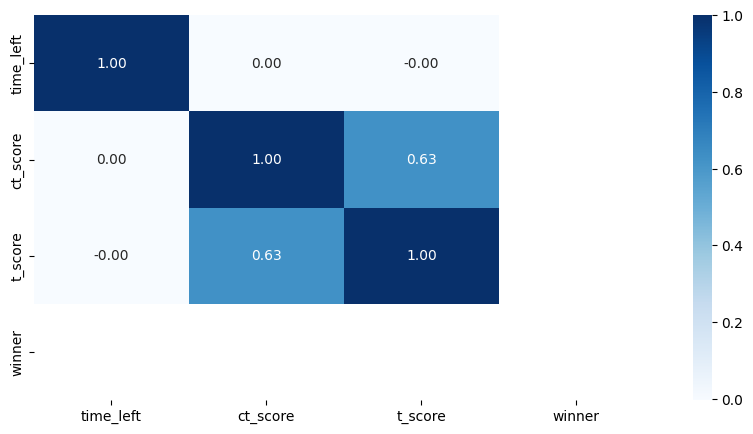

In [91]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), cbar=True, annot=True, cmap='Blues', fmt='.2f')
plt.show()

In [94]:
float_cols = df.select_dtypes(include=['float64']).columns
df[float_cols] = df[float_cols].astype('float32')

In [95]:
df_subset = df.head(1000)
df

,time_left,ct_score,t_score,map,winner
0,175.000000,0.0,0.0,de_dust2,0
1,156.029999,0.0,0.0,de_dust2,0
2,96.029999,0.0,0.0,de_dust2,0
3,76.029999,0.0,0.0,de_dust2,0
4,174.970001,1.0,0.0,de_dust2,0
...,...,...,...,...,...
122405,15.410000,11.0,14.0,de_train,0
122406,174.929993,11.0,15.0,de_train,0
122407,114.930000,11.0,15.0,de_train,0
122408,94.930000,11.0,15.0,de_train,0


# menlihat jumlah baris yang merupakan duplikat dalam DataFrame

In [96]:
print("NIlai Duplikat: ")
df.duplicated().sum()

NIlai Duplikat: 


42089

In [97]:
df.drop_duplicates(inplace=True)

In [98]:
print("NIlai Duplikat: ")
df.duplicated().sum()

NIlai Duplikat: 


0

In [99]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df.ct_score = scaler.fit_transform(df.ct_score.values.reshape(-1,1))

# melatih model pada data pelatihan dan menguji kinerjanya pada data pengujian untuk mengukur sejauh mana model Anda berhasil dalam melakukan prediksi target

In [100]:
from sklearn.model_selection import train_test_split

X = df[['time_left', 'time_left']]
y = df['winner'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
print(df.columns)

Index(['time_left', 'ct_score', 't_score', 'map', 'winner'], dtype='object')


In [102]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [103]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
model = Sequential()

# Hasil pelatihan model, termasuk histori pelatihan (loss dan metrik akurasi pada setiap epoch), akan disimpan dalam variabel history. Anda dapat menggunakan data histori ini untuk menganalisis kinerja model

In [105]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=4, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/4
1607/1607 [==============================] - 4s 2ms/step - loss: 2.7630 - accuracy: 1.0000 - val_loss: 2.7374 - val_accuracy: 1.0000
Epoch 2/4
1607/1607 [==============================] - 3s 2ms/step - loss: 2.7630 - accuracy: 1.0000 - val_loss: 2.7374 - val_accuracy: 1.0000
Epoch 3/4
1607/1607 [==============================] - 3s 2ms/step - loss: 2.7630 - accuracy: 1.0000 - val_loss: 2.7374 - val_accuracy: 1.0000
Epoch 4/4
1607/1607 [==============================] - 3s 2ms/step - loss: 2.7630 - accuracy: 1.0000 - val_loss: 2.7374 - val_accuracy: 1.0000


# melihat grafik bagaimana akurasi dan loss pada data pelatihan dan data validasi berubah selama pelatihan model

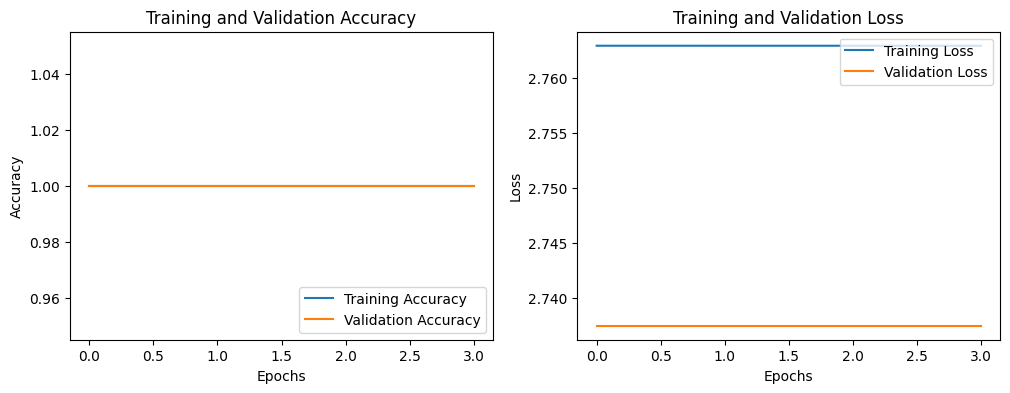

In [82]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()
